# Leads and Customers Dataset - Exploration
matthew thomas
<br>
mt.paragon5@gmail.com

In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
leads_and_customers = 'data\\leads-and-customers.csv'
lead_scoring_fields = 'data\\Lead-Scoring-Fields.csv'

In [3]:
df_lac = pd.read_csv(leads_and_customers)
df_lsf = pd.read_csv(lead_scoring_fields)

#### checking for null / na values

In [4]:
# df_lac.isnull().sum()
# df_lac.isna().sum()

#### checking types

In [5]:
df_lac.dtypes

address                                object
birthdate                              object
mail                                   object
name                                   object
sex                                    object
username                               object
days_since_signup                       int64
acquisition_channel                    object
job_title                              object
company_size                           object
completed_form                          int64
visited_pricing                         int64
registered_for_webinar                  int64
attended_webinar                        int64
industry                               object
converted                               int64
is_manager                               bool
acquisition_channel_Cold Call           int64
acquisition_channel_Cold Email          int64
acquisition_channel_Organic Search      int64
acquisition_channel_Paid Leads          int64
acquisition_channel_Paid Search   

#### rename column names

In [6]:
df_lac.columns = map(str.lower, df_lac.columns)
df_lac.columns = df_lac.columns.str.replace(' ', '_')
df_lac.columns = df_lac.columns.str.replace('-', '_to_')
df_lac.columns = df_lac.columns.str.replace('+', '_plus')

#### column manipulation
 - change birthdate to datetime
 - add age_seconds column (int); not sure if useful
 - added year_month column to investigate trends in scores by age groups
 - added the following columns:
    - age_seconds
    - bd_year_month
    - bd_month
    - is_male
    - is_manager
    - is_director
    - is_vp
    - is_admin
    - is_chief_officer
    - is_advertising
    - is_sales
    - is_marketing
    - is_other
    - is_web_ind
    - is_financials_ind
    - is_furniture_ind
    - is_transportation_ind
    - is_manufacturing_ind
    - is_scandesign_ind
    - score_normalized


In [24]:
score_max = df_lac['score'].max()

df_lac.birthdate = pd.to_datetime(df_lac.birthdate)
df_lac['age_seconds'] = df_lac.birthdate.map(dt.datetime.toordinal)
df_lac['bd_year_month'] = df_lac.birthdate.apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
df_lac['bd_month'] = df_lac.birthdate.apply(lambda x: '{month}'.format(month=int(x.month)) if len(str(x.month)) > 1 else '{0}{month}'.format(0, month=int(x.month)))
df_lac['is_male'] = df_lac.sex.apply(lambda x: 1 if x=='M' else 0)
df_lac['is_manager'] = df_lac.job_title.apply(lambda x: 1 if 'Manager' in x else 0)
df_lac['is_director'] = df_lac.job_title.apply(lambda x: 1 if 'Director' in x else 0)
df_lac['is_vp'] = df_lac.job_title.apply(lambda x: 1 if 'VP' in x else 0)
df_lac['is_admin'] = df_lac.job_title.apply(lambda x: 1 if 'Administrator' in x else 0)
df_lac['is_chief_officer'] = df_lac.job_title.apply(lambda x: 1 if ('Chief' in x and 'Officer' in x) else 0)
df_lac['is_advertising'] = df_lac.job_title.apply(lambda x: 1 if 'Advertising' in x else 0)
df_lac['is_sales'] = df_lac.job_title.apply(lambda x: 1 if 'Sales' in x else 0)
df_lac['is_marketing'] = df_lac.job_title.apply(lambda x: 1 if 'Marketing' in x else 0)
df_lac['is_other'] = df_lac.job_title.apply(lambda x: 1 if ('Advertising' not in x and 'Marketing' not in x and 'Advertising' not in x) else 0)
df_lac['is_web_ind'] = df_lac.job_title.apply(lambda x: 1 if 'Web' in x else 0)
df_lac['is_financials_ind'] = df_lac.job_title.apply(lambda x: 1 if 'Financial' in x else 0)
df_lac['is_furniture_ind'] = df_lac.job_title.apply(lambda x: 1 if 'Furniture' in x else 0)
df_lac['is_transportation_ind'] = df_lac.job_title.apply(lambda x: 1 if 'Transportation' in x else 0)
df_lac['is_manufacturing_ind'] = df_lac.job_title.apply(lambda x: 1 if 'Manufacturing' in x else 0)
df_lac['is_scandesign_ind'] = df_lac.job_title.apply(lambda x: 1 if 'Scandanavion' in x else 0)
df_lac['score_normalized'] = df_lac.score.apply(lambda x: x / score_max)

# df_lac.bd_year_month = pd.to_datetime(df_lac.birthdate, format='%Y-%m')


In [25]:
df_grouped_by_ym = df_lac.set_index('bd_year_month').groupby('bd_year_month')
df_grouped_by_m = df_lac.set_index('bd_month').groupby('bd_month')
df_score_grouped_by_ym = df_grouped_by_ym['score']
df_score_grouped_by_m = df_grouped_by_m['score']

In [26]:
df_ym_described = df_score_grouped_by_ym.describe()
df_m_described = df_score_grouped_by_m.describe()

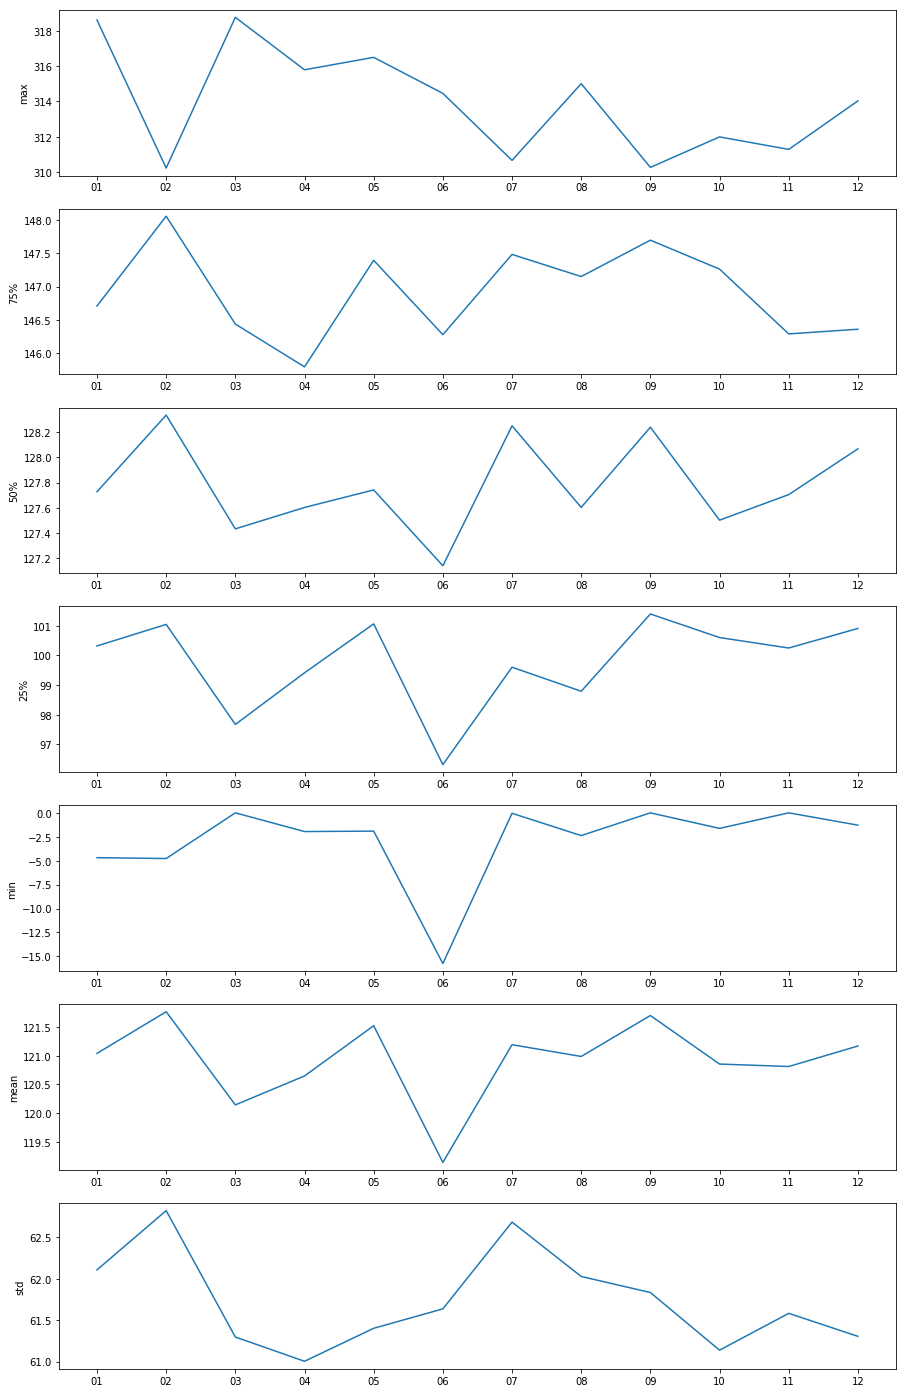

In [27]:
fig, axs = plt.subplots(7,1,figsize=(15,25))

axs[0].plot(df_m_described.index, df_m_described['max'])
axs[1].plot(df_m_described.index, df_m_described['75%'])
axs[2].plot(df_m_described.index, df_m_described['50%'])
axs[3].plot(df_m_described.index, df_m_described['25%'])
axs[4].plot(df_m_described.index, df_m_described['min'])
axs[5].plot(df_m_described.index, df_m_described['mean'])
axs[6].plot(df_m_described.index, df_m_described['std'])

axs[0].set_ylabel('max')
axs[1].set_ylabel('75%')
axs[2].set_ylabel('50%')
axs[3].set_ylabel('25%')
axs[4].set_ylabel('min')
axs[5].set_ylabel('mean')
axs[6].set_ylabel('std')


plt.show()

#### Observation:
- customers born in June seem to have lower average scores

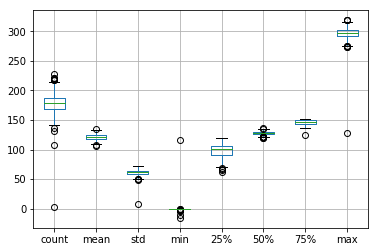

In [28]:
df_ym_described.boxplot(column=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

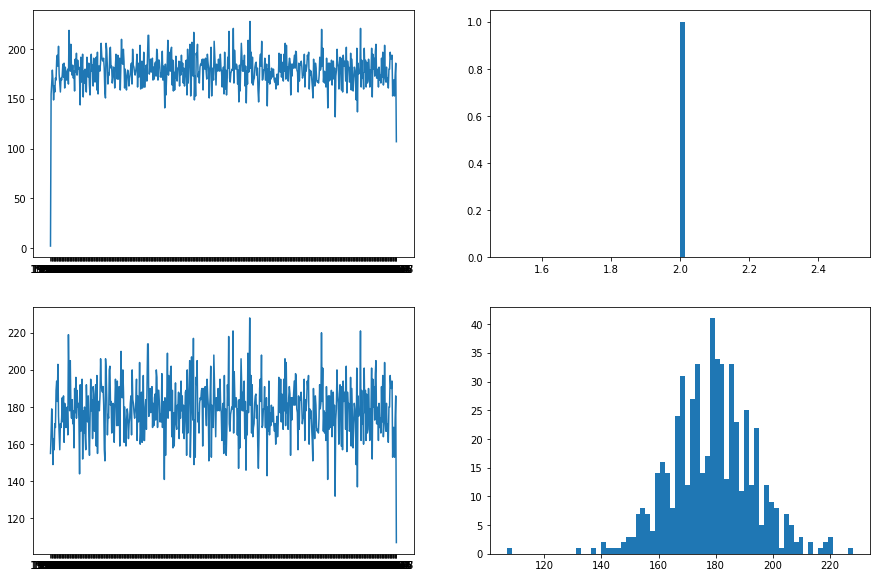

In [29]:
fig, axs = plt.subplots(2,2,figsize=(15,10))

bin_count = (df_ym_described['count'].count()) // 8

axs[0,0].plot(df_ym_described['count'])
axs[0,1].hist(df_ym_described[df_ym_described['count']<100]['count'], bins=bin_count)
axs[1,0].plot(df_ym_described[df_ym_described['count']>100]['count'])
axs[1,1].hist(df_ym_described[df_ym_described['count']>100]['count'], bins=bin_count)

plt.show()

In [30]:
df_ym_described[df_ym_described['count']<100]

,count,mean,std,min,25%,50%,75%,max
bd_year_month,,,,,,,,
1969-12,2.0,122.433074,8.227271,116.615515,119.524294,122.433074,125.341853,128.250633


#### Observation:
- customers seem to be evenly distributed across birth year/birth month
- not so much for birth month only

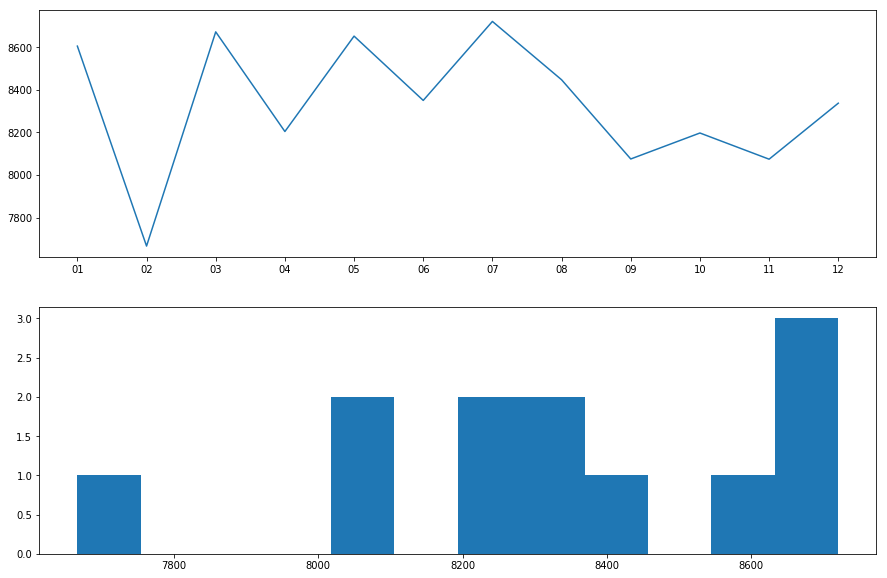

In [31]:
fig, axs = plt.subplots(2,1,figsize=(15,10))

axs[0].plot(df_m_described['count'])
axs[1].hist(df_m_described['count'], bins=12)


plt.show()

In [34]:
df_lac.dtypes

address                                       object
birthdate                             datetime64[ns]
mail                                          object
name                                          object
sex                                           object
username                                      object
days_since_signup                              int64
acquisition_channel                           object
job_title                                     object
company_size                                  object
completed_form                                 int64
visited_pricing                                int64
registered_for_webinar                         int64
attended_webinar                               int64
industry                                      object
converted                                      int64
is_manager                                     int64
acquisition_channel_cold_call                  int64
acquisition_channel_cold_email                

#### df of each column with number value and its mean resampled by year

In [66]:
df_resampled = (
    df_lac.set_index('birthdate')
        .resample('y')
        .agg({'score': 'mean', 
                'days_since_signup':'mean',
                'completed_form':'mean',
                'visited_pricing':'mean',
                'registered_for_webinar':'mean',
                'attended_webinar':'mean',
                'converted':'mean',
                'is_manager':'mean',
                'acquisition_channel_cold_call':'mean',
                'acquisition_channel_cold_email':'mean',
                'acquisition_channel_organic_search':'mean',
                'acquisition_channel_paid_leads':'mean',
                'acquisition_channel_paid_search':'mean',
                'company_size_1_to_10':'mean',
                'company_size_1000_to_10000':'mean',
                'company_size_10001_plus':'mean',
                'company_size_101_to_250':'mean',
                'company_size_11_to_50':'mean',
                'company_size_251_to_1000':'mean',
                'company_size_51_to_100':'mean',
                'industry_financial_services':'mean',
                'industry_furniture':'mean',
                'industry_heavy_manufacturing':'mean',
                'scandanavion_design':'mean',
                'transportation':'mean',
                'internet':'mean',
                'score':'mean',
                'age_seconds':'mean',
                'bd_month':'mean',
                'is_male':'mean',
                'is_director':'mean',
                'is_vp':'mean',
                'is_admin':'mean',
                'is_chief_officer':'mean',
                'is_advertising':'mean',
                'is_sales':'mean',
                'is_marketing':'mean',
                'is_other':'mean',
                'is_web_ind':'mean',
                'is_financials_ind':'mean',
                'is_furniture_ind':'mean',
                'is_transportation_ind':'mean',
                'is_manufacturing_ind':'mean',
                'is_scandesign_ind':'mean',
                'score_normalized':'mean'})
)
df_resampled

,score,days_since_signup,completed_form,visited_pricing,registered_for_webinar,attended_webinar,converted,is_manager,acquisition_channel_cold_call,acquisition_channel_cold_email,...,is_sales,is_marketing,is_other,is_web_ind,is_financials_ind,is_furniture_ind,is_transportation_ind,is_manufacturing_ind,is_scandesign_ind,score_normalized
birthdate,,,,,,,,,,,,,,,,,,,,,
1969-12-31,122.433074,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.500000,0.000000,1.000000,0,0,0,0,0,0,0.384069
1970-12-31,120.489006,13.987769,0.794031,0.893836,0.198141,0.104697,0.226517,0.438845,0.206947,0.245108,...,0.143836,0.132583,0.700098,0,0,0,0,0,0,0.377971
1971-12-31,120.721435,14.480248,0.802475,0.875297,0.197049,0.097573,0.224179,0.426940,0.182770,0.240362,...,0.147549,0.122799,0.715850,0,0,0,0,0,0,0.378700
1972-12-31,120.678449,14.301183,0.802548,0.886260,0.191993,0.097816,0.223385,0.451319,0.202457,0.249318,...,0.164695,0.131028,0.713376,0,0,0,0,0,0,0.378565
1973-12-31,120.874375,14.204545,0.801610,0.887311,0.201705,0.099905,0.229167,0.447917,0.202652,0.225379,...,0.154356,0.125000,0.711174,0,0,0,0,0,0,0.379179
1974-12-31,123.883358,14.634286,0.804286,0.880000,0.189048,0.100000,0.244286,0.433810,0.190000,0.251429,...,0.150476,0.125714,0.719524,0,0,0,0,0,0,0.388619
1975-12-31,123.433459,14.714759,0.784295,0.886471,0.195364,0.103122,0.242195,0.410123,0.201987,0.247398,...,0.147588,0.114475,0.712867,0,0,0,0,0,0,0.387207
1976-12-31,120.261013,15.224750,0.807097,0.891265,0.202457,0.100091,0.226115,0.437216,0.194268,0.255687,...,0.149227,0.141037,0.700637,0,0,0,0,0,0,0.377255
1977-12-31,122.245198,14.788311,0.784169,0.865163,0.212149,0.113668,0.233318,0.429360,0.212609,0.240681,...,0.165670,0.118270,0.724804,0,0,0,0,0,0,0.383480


In [36]:
# ---- playground for finding unique job_titles and industry terms ---- #

# s = ""
# for c in df_lac.job_title.unique():
#     s += c + " "
    
    
# words = s.split()
# uwords = []
# for w in words:
#     if w not in uwords:
#         uwords.append(w)
        
# uwords
# s
# df_lac.job_title.unique()

# df_lac.industry.unique()

In [37]:
# ------- done graphing so I don't care how the months are sorted now in the xlabels from earlier ------ #
df_lac['bd_month'] = df_lac.bd_month.apply(lambda x: int(x))

#### Clean Up:
- removing non-number value columns
- creating new df

In [67]:
to_drop = ['address', 
           'birthdate', 
           'mail', 
           'name', 
           'sex', 
           'username', 
           'acquisition_channel', 
           'job_title', 
           'company_size', 
           'industry', 
           'bd_year_month']

In [70]:
df_numerical = df_lac.drop(to_drop, axis=1)

In [71]:
df_numerical.dtypes

days_since_signup                       int64
completed_form                          int64
visited_pricing                         int64
registered_for_webinar                  int64
attended_webinar                        int64
converted                               int64
is_manager                              int64
acquisition_channel_cold_call           int64
acquisition_channel_cold_email          int64
acquisition_channel_organic_search      int64
acquisition_channel_paid_leads          int64
acquisition_channel_paid_search         int64
company_size_1_to_10                    int64
company_size_1000_to_10000              int64
company_size_10001_plus                 int64
company_size_101_to_250                 int64
company_size_11_to_50                   int64
company_size_251_to_1000                int64
company_size_51_to_100                  int64
industry_financial_services             int64
industry_furniture                      int64
industry_heavy_manufacturing      

In [72]:
df_numerical

,days_since_signup,completed_form,visited_pricing,registered_for_webinar,attended_webinar,converted,is_manager,acquisition_channel_cold_call,acquisition_channel_cold_email,acquisition_channel_organic_search,...,is_sales,is_marketing,is_other,is_web_ind,is_financials_ind,is_furniture_ind,is_transportation_ind,is_manufacturing_ind,is_scandesign_ind,score_normalized
0,18,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0.473683
1,3,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0.443437
2,26,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0.377844
3,19,1,1,1,1,1,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0.785295
4,7,1,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0.000000
5,19,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.411085
6,4,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0.436955
7,18,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.084716
8,22,0,1,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.857078
9,14,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.324762
